In [42]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import (
    confusion_matrix, classification_report, roc_auc_score, roc_curve
)

import warnings
warnings.filterwarnings('ignore')

# Loading the Datasets

In [43]:
df_white = pd.read_csv('/content/winequality-white.csv', sep=';')
df_red = pd.read_csv('/content/winequality-red.csv', sep=';')

In [44]:
# Adding a color column to distinguish them
df_white['color'] = 'white'
df_red['color'] = 'red'

In [45]:
# Combining both datasets
df = pd.concat([df_white, df_red], ignore_index=True)
print("\n Combined Dataset Loaded Successfully!")
print(f"Total samples: {len(df)}, White wines: {len(df_white)}, Red wines: {len(df_red)}\n")


 Combined Dataset Loaded Successfully!
Total samples: 6497, White wines: 4898, Red wines: 1599



# Basic Info

In [46]:
print("\nFirst 5 rows of the dataset:")
print(df.head())


First 5 rows of the dataset:
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  quality  color  
0      8.8        6  white 

In [47]:
print("\nDataset Info:")
print(df.info())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  color                 6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB
None


In [48]:
print("\nMissing values per column:")
print(df.isnull().sum())


Missing values per column:
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
color                   0
dtype: int64


# Exploratory Data Analysis

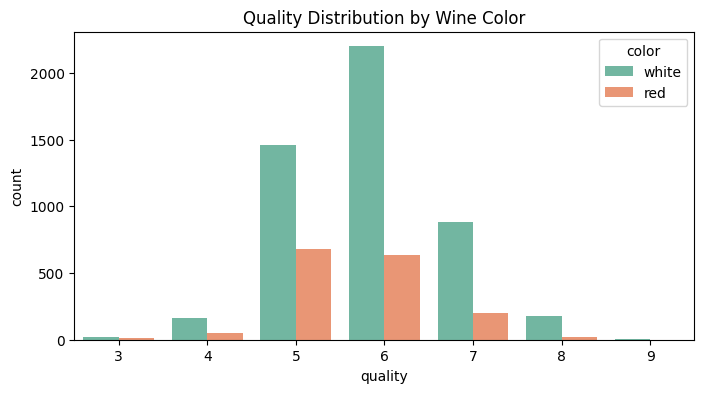

In [49]:
# Distribution by Wine Color
plt.figure(figsize=(8, 4))
sns.countplot(x='quality', hue='color', data=df, palette='Set2')
plt.title('Quality Distribution by Wine Color')
plt.show()

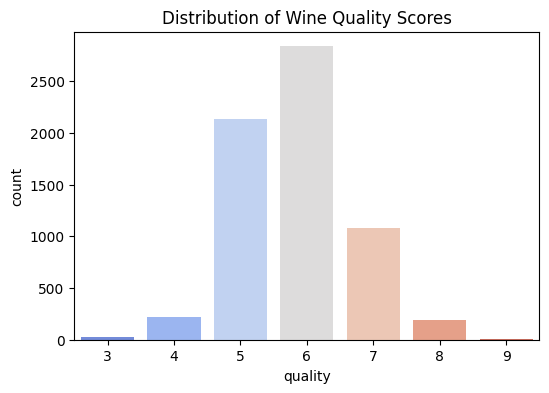

In [50]:
# Distribution of target variable
plt.figure(figsize=(6, 4))
sns.countplot(x='quality', data=df, palette='coolwarm')
plt.title('Distribution of Wine Quality Scores')
plt.show()

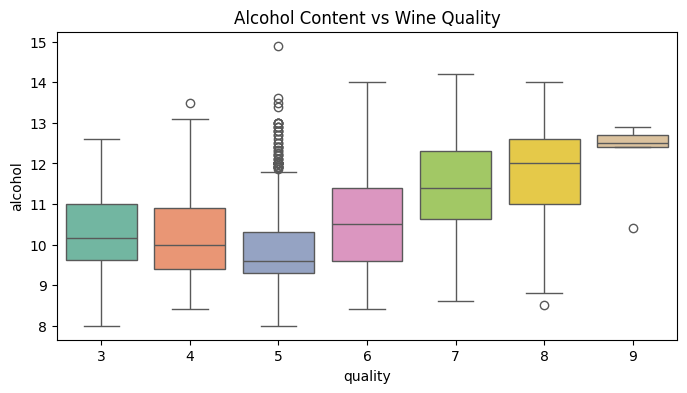

In [51]:
# Alcohol vs Quality
plt.figure(figsize=(8, 4))
sns.boxplot(x='quality', y='alcohol', data=df, palette='Set2')
plt.title('Alcohol Content vs Wine Quality')
plt.show()

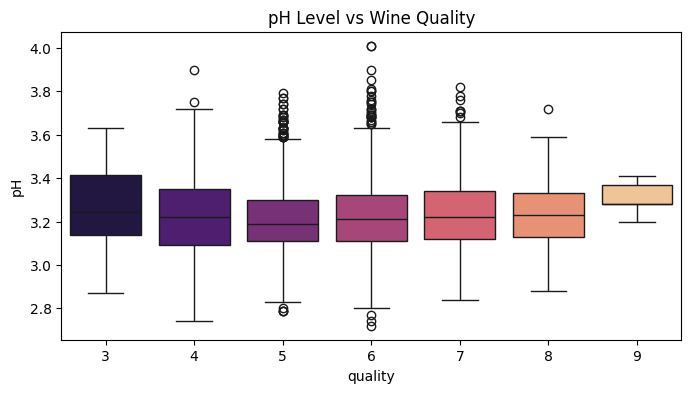

In [52]:
# pH vs Quality
plt.figure(figsize=(8, 4))
sns.boxplot(x='quality', y='pH', data=df, palette='magma')
plt.title('pH Level vs Wine Quality')
plt.show()

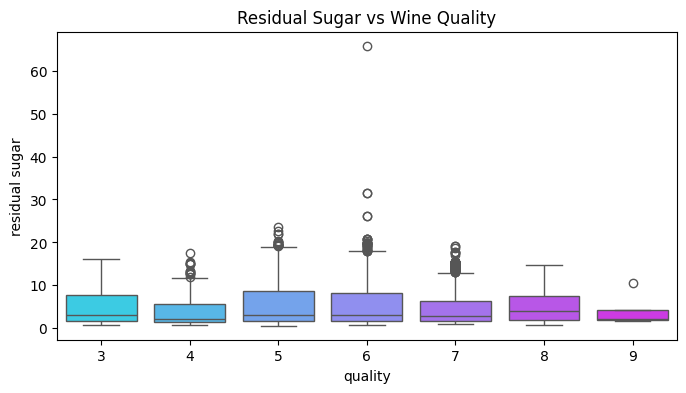

In [53]:
# Residual sugar vs Quality
plt.figure(figsize=(8, 4))
sns.boxplot(x='quality', y='residual sugar', data=df, palette='cool')
plt.title('Residual Sugar vs Wine Quality')
plt.show()

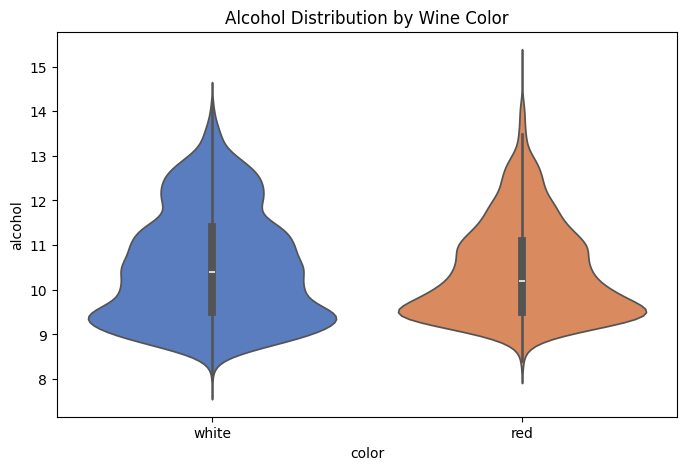

In [54]:
# Violin plot for alcohol by color
plt.figure(figsize=(8, 5))
sns.violinplot(x='color', y='alcohol', data=df, palette='muted')
plt.title('Alcohol Distribution by Wine Color')
plt.show()

## Correlation Heatmap

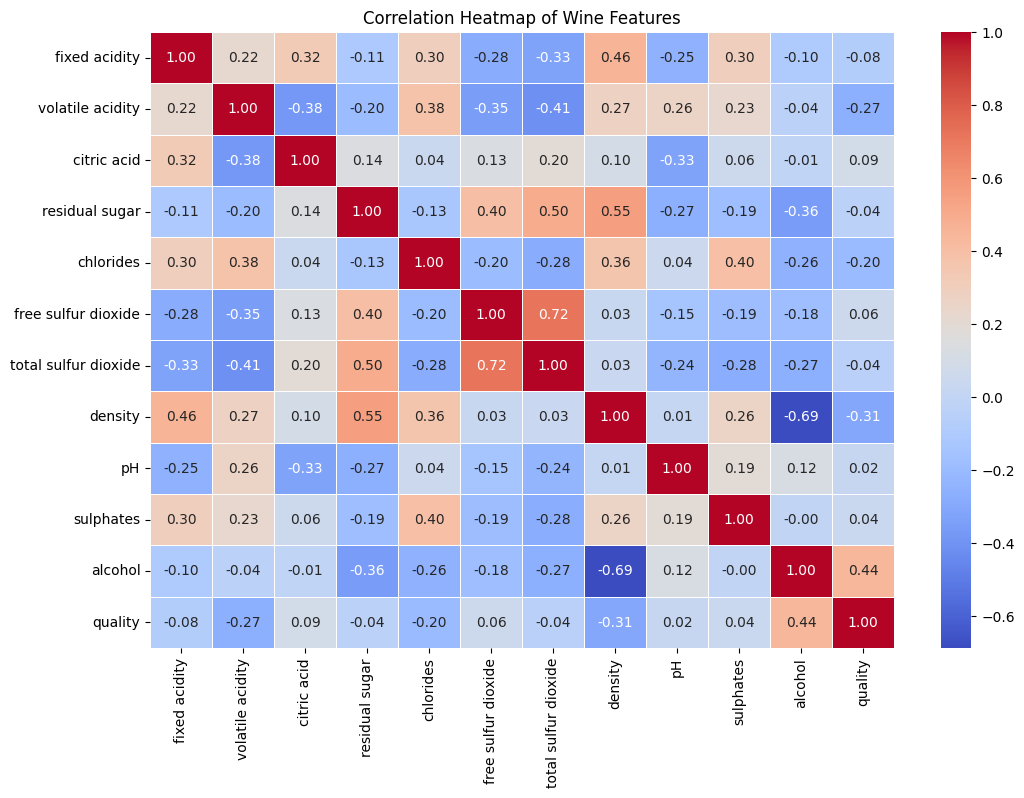

In [55]:
plt.figure(figsize=(12, 8))
corr_matrix = df.corr(numeric_only=True)
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Wine Features')
plt.show()

# Encoding 'color' column

In [56]:
df['color'] = df['color'].map({'red': 0, 'white': 1})

## Feature Selection and Scaling

In [57]:
X = df.drop(columns=['quality'])
y = df['quality']

In [58]:
# converting quality to binary: 0 = low quality (<6), 1 = good quality (>=6)
y = (y >= 6).astype(int)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Spliting dataset

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)
print("\n Train/Test split complete.")
print(f"Training samples: {X_train.shape[0]}, Testing samples: {X_test.shape[0]}")


 Train/Test split complete.
Training samples: 5197, Testing samples: 1300


# Machine learning Model

##  DECISION TREE

In [60]:
print("\n  Training Decision tree ")

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

y_pred_dt = dt.predict(X_test)
y_prob_dt = dt.predict_proba(X_test)[:, 1]


  Training Decision tree 


### classification report

In [61]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred_dt))


Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.66      0.67       477
           1       0.81      0.83      0.82       823

    accuracy                           0.77      1300
   macro avg       0.75      0.74      0.75      1300
weighted avg       0.76      0.77      0.76      1300



### Confusion matrix


Confusion Matrix (Decision Tree):


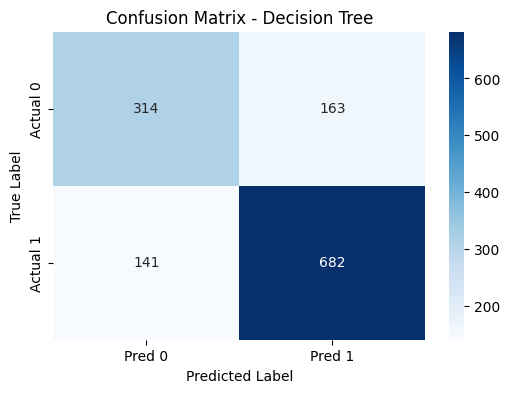

In [62]:
print("\nConfusion Matrix (Decision Tree):")
cm_dt = confusion_matrix(y_test, y_pred_dt)

plt.figure(figsize=(6,4))
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Pred 0', 'Pred 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix - Decision Tree')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

### AUC-ROC curved

AUC-ROC: 0.7434782497943048


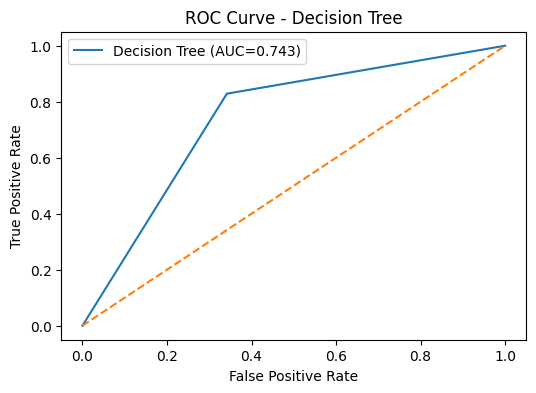

In [63]:
auc_dt = roc_auc_score(y_test, y_prob_dt)
print("AUC-ROC:", auc_dt)

fpr, tpr, _ = roc_curve(y_test, y_prob_dt)
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f"Decision Tree (AUC={auc_dt:.3f})")
plt.plot([0,1],[0,1],'--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Decision Tree")
plt.legend()
plt.show()

## LOGISTIC REGRESSION

In [64]:
print("\n Training LOGISTIC REGRESSION ")

lr = LogisticRegression(max_iter=2000)
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)
y_prob_lr = lr.predict_proba(X_test)[:, 1]


 Training LOGISTIC REGRESSION 


### classification report

In [65]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred_lr))


Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.52      0.59       477
           1       0.76      0.86      0.80       823

    accuracy                           0.74      1300
   macro avg       0.72      0.69      0.70      1300
weighted avg       0.73      0.74      0.73      1300



### Confusion matrix


Confusion Matrix (Logistic Regression):


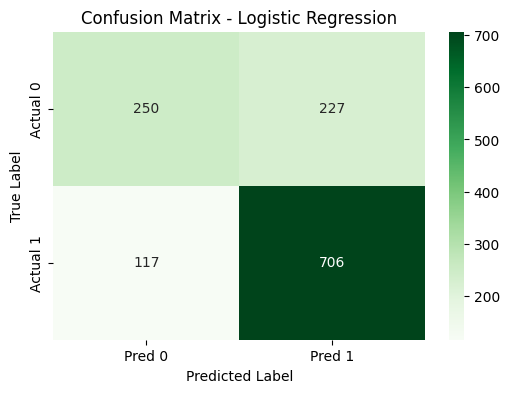

In [66]:
print("\nConfusion Matrix (Logistic Regression):")
cm_lr = confusion_matrix(y_test, y_pred_lr)

plt.figure(figsize=(6,4))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Greens',
            xticklabels=['Pred 0', 'Pred 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

### AUC-ROC curved

AUC-ROC: 0.792855305154991


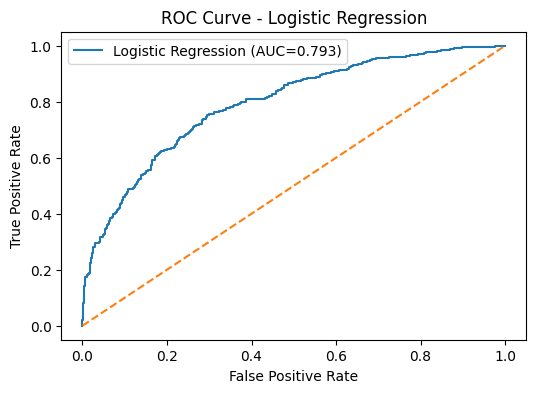

In [67]:
auc_lr = roc_auc_score(y_test, y_prob_lr)
print("AUC-ROC:", auc_lr)

fpr, tpr, _ = roc_curve(y_test, y_prob_lr)
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f"Logistic Regression (AUC={auc_lr:.3f})")
plt.plot([0,1],[0,1],'--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Logistic Regression")
plt.legend()
plt.show()

## SVM CLASSIFIER

In [68]:
print("\n Training SVM CLASSIFIER")

svm = SVC(kernel="rbf", probability=True)
svm.fit(X_train, y_train)

y_pred_svm = svm.predict(X_test)
y_prob_svm = svm.predict_proba(X_test)[:, 1]


 Training SVM CLASSIFIER


### classification report

In [69]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred_svm))


Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.59      0.64       477
           1       0.78      0.86      0.82       823

    accuracy                           0.76      1300
   macro avg       0.74      0.72      0.73      1300
weighted avg       0.75      0.76      0.75      1300



### Confusion matrix


Confusion Matrix (SVM classifier):


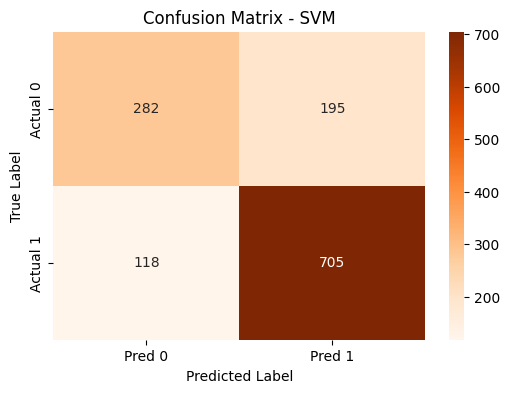

In [70]:
print("\nConfusion Matrix (SVM classifier):")
cm_svm = confusion_matrix(y_test, y_pred_svm)

plt.figure(figsize=(6,4))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Oranges',
            xticklabels=['Pred 0', 'Pred 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix - SVM')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

### AUC-ROC curved

AUC-ROC: 0.8287851114830185


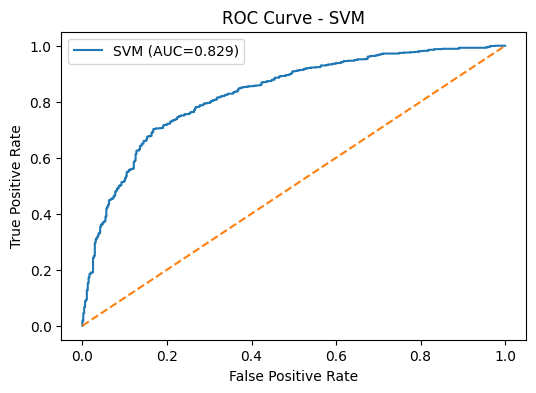

In [71]:
auc_svm = roc_auc_score(y_test, y_prob_svm)
print("AUC-ROC:", auc_svm)

fpr, tpr, _ = roc_curve(y_test, y_prob_svm)
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f"SVM (AUC={auc_svm:.3f})")
plt.plot([0,1],[0,1],'--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - SVM")
plt.legend()
plt.show()

## KNN CLASSIFIER

In [72]:
print("\n Training KNN CLASSIFIER ")

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

y_pred_knn = knn.predict(X_test)
y_prob_knn = knn.predict_proba(X_test)[:, 1]


 Training KNN CLASSIFIER 


### classification report

In [73]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred_knn))


Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.62      0.65       477
           1       0.79      0.83      0.81       823

    accuracy                           0.75      1300
   macro avg       0.73      0.72      0.73      1300
weighted avg       0.75      0.75      0.75      1300



### Confusion matrix


Confusion Matrix (KNN):


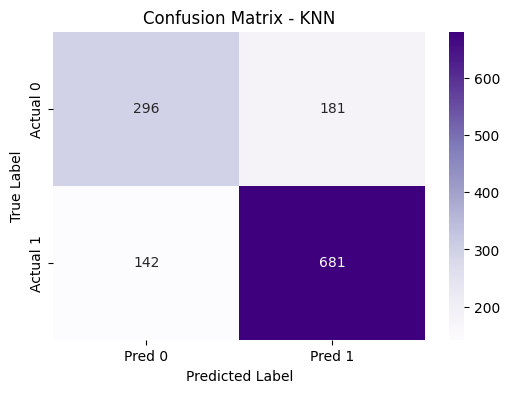

In [74]:
print("\nConfusion Matrix (KNN):")
cm_knn = confusion_matrix(y_test, y_pred_knn)

plt.figure(figsize=(6,4))
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Purples',
            xticklabels=['Pred 0', 'Pred 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix - KNN')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

### AUC-ROC curved

AUC-ROC: 0.8133203929989734


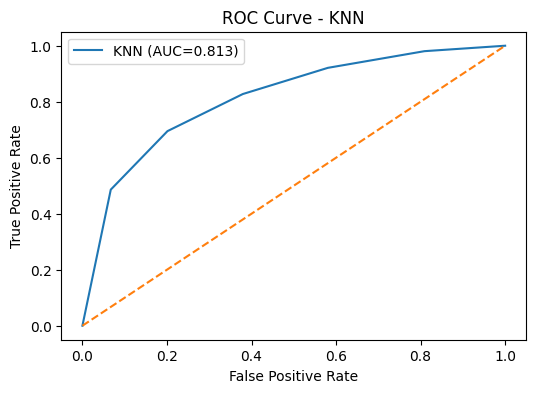

In [75]:
auc_knn = roc_auc_score(y_test, y_prob_knn)
print("AUC-ROC:", auc_knn)

fpr, tpr, _ = roc_curve(y_test, y_prob_knn)
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f"KNN (AUC={auc_knn:.3f})")
plt.plot([0,1],[0,1],'--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - KNN")
plt.legend()
plt.show()

# Model comparison

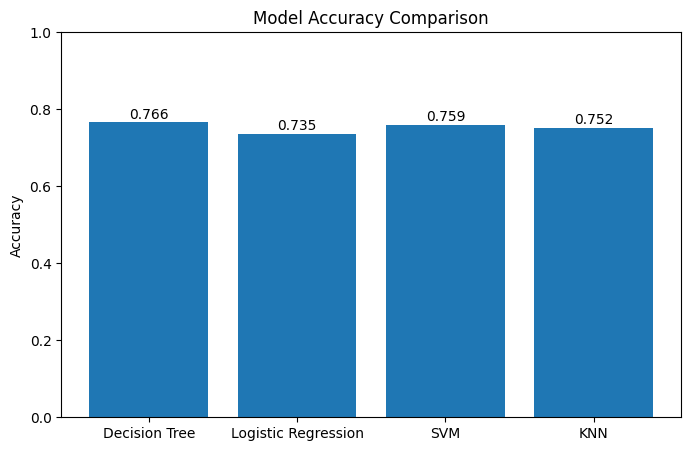

In [77]:
from sklearn.metrics import accuracy_score

# Calculating accuracies
acc_dt = accuracy_score(y_test, y_pred_dt)
acc_lr = accuracy_score(y_test, y_pred_lr)
acc_svm = accuracy_score(y_test, y_pred_svm)
acc_knn = accuracy_score(y_test, y_pred_knn)

model_names = ['Decision Tree', 'Logistic Regression', 'SVM', 'KNN']
accuracies = [acc_dt, acc_lr, acc_svm, acc_knn]

plt.figure(figsize=(8, 5))
plt.bar(model_names, accuracies)
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.ylim(0, 1)

for i, acc in enumerate(accuracies):
    plt.text(i, acc + 0.01, f"{acc:.3f}", ha='center', fontsize=10)

plt.show()
